In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [58]:
reps = [nx.random_regular_graph(d=2, n=10) for i in range(3)]

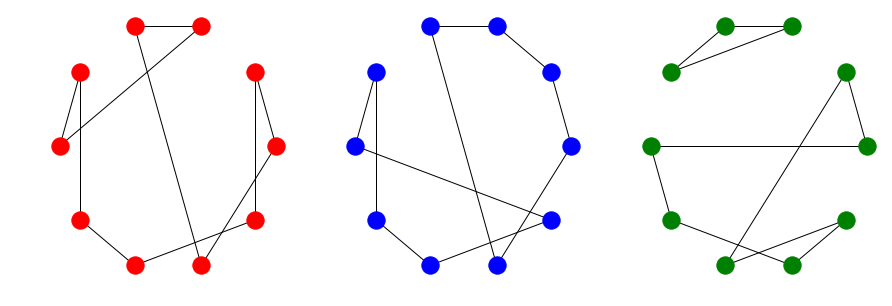

In [59]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
colors = ['red', 'blue', 'green']
for i,r in enumerate(reps):
    nx.draw_circular(r, ax=axs[i], node_color=colors[i])
plt.savefig("cluster_representative.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()

In [60]:
adjacencies = []
for i in range(3):
    A = nx.adjacency_matrix(reps[i]).todense().astype(float)
    A[np.where(A!=0)]= np.random.rand(np.where(A!=0)[0].size)*0.45
    np.fill_diagonal(A, 1)
    adjacencies.append(A)

In [25]:
from regain.utils import is_pos_def

In [29]:
is_pos_def(adjacencies[2])

True

In [34]:
np.linalg.norm(adjacencies[0]-adjacencies[1])**2

1.488057378179761

In [35]:
np.sum(adjacencies[0]-adjacencies[1])

0.2311923344875096

In [74]:
np.nonzero(diff_12)[0].shape[0]

16

In [61]:
adjacencies[0]


matrix([[1.        , 0.31912155, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.37723661, 0.        ],
        [0.42660758, 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.06581424],
        [0.        , 0.        , 1.        , 0.28705368, 0.        ,
         0.05656872, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.04877232, 1.        , 0.        ,
         0.        , 0.        , 0.        , 0.38219449, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.        ,
         0.11066996, 0.00680804, 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.38669211, 0.        , 0.43785203,
         1.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.15819717,
         0.        , 1.        , 0.19738343, 0.        , 0.        ],
        [0.        , 0.    

In [100]:
np.sort??

In [203]:

def make_datasets(n_obs=10, degree=2, clusters=3, T=15, n_samples=100, repetitions=False):
    clusters_reps = [nx.random_regular_graph(d=degree, n=n_obs) for i in range(clusters)]
    adjacencies = []
    for i in range(clusters):
        A = nx.adjacency_matrix(clusters_reps[i]).todense().astype(float)
        A[np.where(A!=0)]= np.random.rand(np.where(A!=0)[0].size)*0.45
        np.fill_diagonal(A, 1)
        adjacencies.append(A)
    
    pos = np.arange(0, T, T//(clusters+1))
    pos = np.sort(pos)
    pos = list(pos)+[T-1]
    
    thetas = []
    for i in range(len(pos)-1):
        how_many = int(pos[i+1]) - int(pos[i])-1
        print(how_many)
        new_list = [adjacencies[i%clusters]]
        target = adjacencies[(i+1)%clusters]

        for i in range(how_many):

            new = new_list[-1].copy()
            diffs = (new!=0).astype(int)-(target!=0).astype(int)
            diff = np.where(diffs!=0)
            if diff == ():
                break
            if(i==0):
                edges_per_change = int((np.nonzero(diffs)[0].shape[0]/2)//(how_many+1))
                if edges_per_change ==0:
                    edges_per_change+=1
            ixs = np.arange(diff[0].shape[0])
            np.random.shuffle(ixs)

            xs = diff[0][ixs[:edges_per_change]]
            ys = diff[1][ixs[:edges_per_change]]
            for j in range(xs.shape[0]):
                if diffs[xs[j], ys[j]] == -1:
                    new[xs[j], ys[j]] = np.random.rand(1)*0.45
                    new[ ys[j], xs[j]]=  new[xs[j], ys[j]]
                else:
                    new[xs[j], ys[j]] = 0
                    new[ ys[j], xs[j]]=0
            new_list.append(new)

        thetas += new_list
    thetas.append(target)
    covs = [np.linalg.inv(t) for t in thetas]
    samples = [np.random.multivariate_normal(np.zeros(n_obs), c, size=n_samples) for c in covs]
    return thetas, samples, covs, clusters_reps, pos

In [204]:
len(thetas)

15

In [205]:
thetas, samples, covs, clusters_reps, pos= make_datasets(n_obs=10, degree=2, clusters=3, T=15, repetitions=False)

2
2
2
2
1


/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: covariance is not positive-semidefinite.


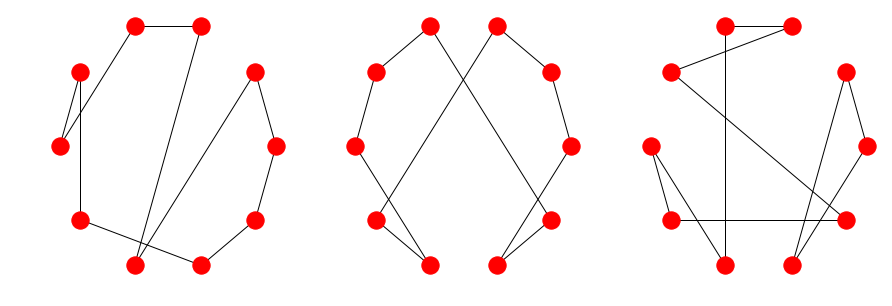

In [196]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
colors = ['red', 'blue', 'green']
for i in range(3):
    nx.draw_circular(reps[i], ax=axs[i])
#plt.savefig("cluster_representative.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()

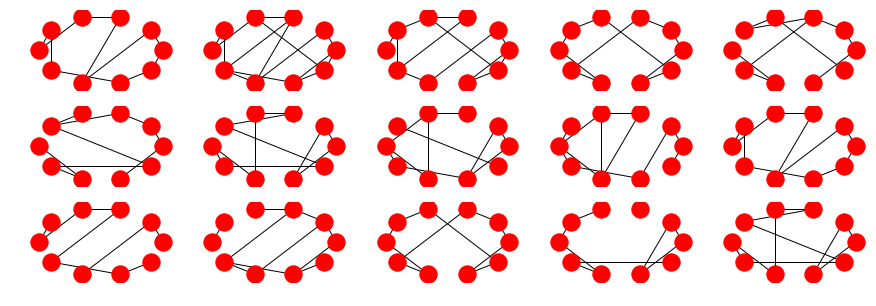

In [197]:
fig, axs = plt.subplots(3,5, figsize=(15,5))
colors = ['red', 'red', 'red', 'blue', 'blue', 'blue']
k = 0
for i in range(3):
    for j in range(5):
        g = nx.from_numpy_array(thetas[k])
        nx.draw_circular(g, ax=axs[i, j])
        k+=1
#plt.savefig("cluster_representative.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()

In [206]:
from regain.norm import l1_norm
distances = np.zeros((15,15))
for i, t in enumerate(thetas):
    for j, t1 in enumerate(thetas):
        distances[i,j] = l1_norm(t-t1)

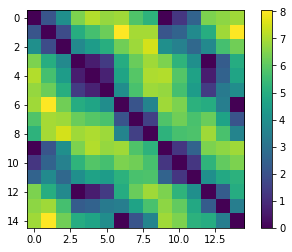

In [207]:
plt.imshow(distances)
plt.colorbar()

In [209]:
X = samples[0]
y = np.zeros(samples[0].shape[0])
for i, s in enumerate(sampless[1:]):
    X = np.vstack((X, s))
    y = np.hstack((y, np.ones(s.shape[0])*(i+1)))

NameError: name 'sampless' is not defined

In [208]:
from regain.covariance.kernel_time_graphical_lasso_ import SimilarityTimeGraphicalLasso

In [ ]:
stgl = SimilarityTimeGraphicalLasso()
stgl.fit()